# AML-3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [108]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [45]:
trainingset = np.loadtxt('dataset/training.csv', delimiter=',')
testingset = np.loadtxt('dataset/test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [46]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [47]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


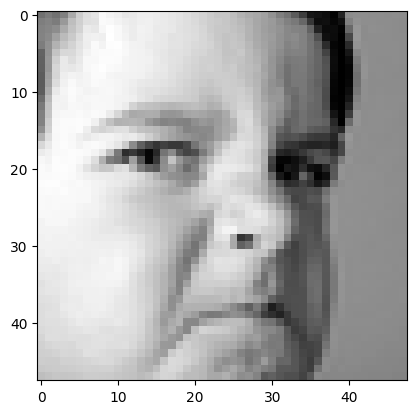

facial emotion: angry


In [48]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

##### [1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [49]:
happy_sad_indices_training = np.where(np.logical_or(y_training[:, 3] == 1, y_training[:, 4] == 1))[0]
happy_sad_indices_testing = np.where(np.logical_or(y_testing[:, 3] == 1, y_testing[:, 4] == 1))[0]

In [50]:
hs_x_training = x_training[happy_sad_indices_training, :]
hs_y_training = y_training[happy_sad_indices_training, :]
hs_x_testing = x_testing[happy_sad_indices_testing, :]
hs_y_testing = y_testing[happy_sad_indices_testing, :]

In [51]:
print(hs_x_testing.shape, hs_y_testing.shape, hs_x_training.shape, hs_y_training.shape)

(1548, 48, 48) (1548, 7) (12045, 48, 48) (12045, 7)


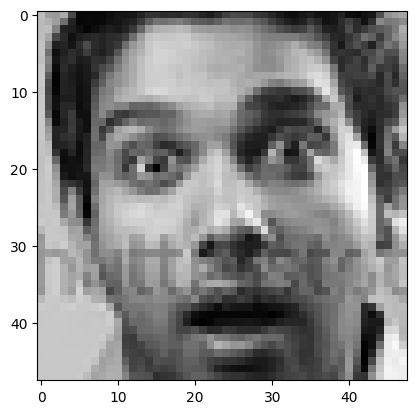

facial emotion: happy


In [52]:
sampleindex = np.random.randint(0, hs_x_training.shape[0])
sample = hs_x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(hs_y_training[sampleindex, :]))

##### [4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [53]:
# flatten the images
flatten_hs_x_training = np.array([img.flatten() for img in hs_x_training])
flatten_hs_x_testing = np.array([img.flatten() for img in hs_x_testing])

In [54]:
pca = PCA(n_components=2)

In [55]:
pca_hs_training = pca.fit_transform(flatten_hs_x_training)
pca_hs_training.shape

(12045, 2)

Let's scale the resulting features

In [56]:
scaler = StandardScaler()

In [57]:
scaled_pca_hs_training = scaler.fit_transform(pca_hs_training)


In [58]:
def sample_n(n_samples, X, y):
    features = []
    labels = []
    for i in range(n_samples):
        sampleindex = np.random.randint(0, X.shape[0])
        sample = X[sampleindex, :]
        label = y[sampleindex, :]
        features.append(sample)
        labels.append(label)
    return np.array(features), np.array(labels)

In [59]:
features, labels = sample_n(200, scaled_pca_hs_training, hs_y_training)

In [60]:
happy = labels[:, 3]

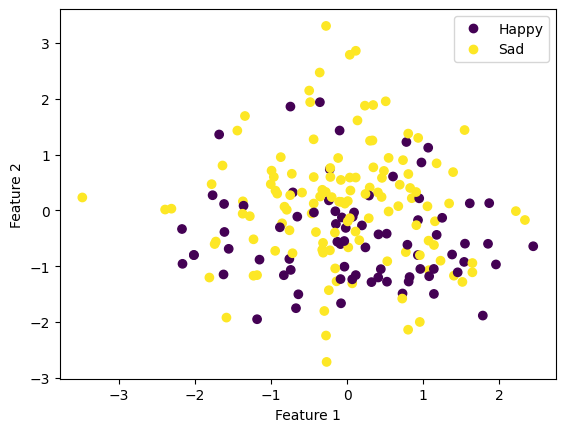

In [17]:
# Create a scatter plot with different colors for each label
scatter = plt.scatter(features[:, 0], features[:, 1], c=happy)

# Set the x and y axis labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend to the plot
plt.legend(handles=scatter.legend_elements()[0], labels=['Happy', 'Sad'])

# Show the plot
plt.show()

From the plot above, PCA seems to perform poorly when it comes to maintaining a separation between the Happy and Sad labels, since there are no identifiable different clusters.

Now let's apply LDA and reduce the dimensionality to 1, since there are only two classes (happy and sad), that's the only possibility for LDA. Let's check either way if it will result in a clear separation between the classes.

In [19]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [20]:
X_lda = lda.fit_transform(flatten_hs_x_training, hs_y_training[:, 3])
print(X_lda.shape)

(12045, 1)


In [43]:
features, labels = sample_n(200, X_lda, hs_y_training)

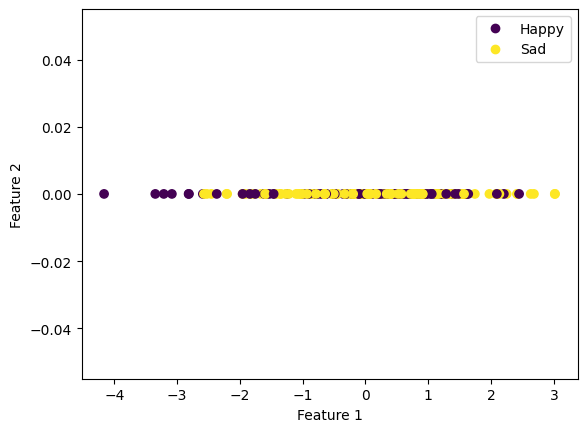

In [22]:
# Create a scatter plot with different colors for each label
scatter = plt.scatter(features[:, 0], np.zeros_like(features[:, 0]),  c=happy)

# Set the x and y axis labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend to the plot
plt.legend(handles=scatter.legend_elements()[0], labels=['Happy', 'Sad'])

# Show the plot
plt.show()

From the scatterplot above LDA also seems unable to separate between the classes efficiently.

##### [2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

Since LDA with one component doesn't seem ideal, we'll explore PCA with different number of features and using no PCA at all.

In [23]:
hs_y_training_label = hs_y_training[:, 3]
hs_y_testing_label = hs_y_testing[:, 3]

Let's start with no dimensionality reduction at all.

In [100]:
gnb = GaussianNB()
gnb.fit(flatten_hs_x_training, hs_y_training_label)

y_pred = gnb.predict(flatten_hs_x_testing)
accuracy = accuracy_score(hs_y_testing_label, y_pred)

In [101]:
accuracy

0.5904392764857881

In [83]:
pctgs = [.1, .15, .3, .4, .5]
n_components = [int(pctg * flatten_hs_x_training.shape[1]) for pctg in pctgs]


In [102]:
accuracies = [accuracy]

In [103]:
for n in n_components:
    pca = PCA(n_components=n)
    new_pca_hs_x_training = pca.fit_transform(flatten_hs_x_training)
    new_pca_hs_x_testing = pca.transform(flatten_hs_x_testing)

    scaled_new_pca_hs_x_training = scaler.fit_transform(new_pca_hs_x_training)
    scaled_new_pca_hs_x_testing = scaler.transform(new_pca_hs_x_testing)

    gnb = GaussianNB()
    gnb.fit(scaled_new_pca_hs_x_training, hs_y_training_label)

    y_pred = gnb.predict(scaled_new_pca_hs_x_testing)
    accuracy = accuracy_score(hs_y_testing_label, y_pred)
    accuracies.append(accuracy)

Let's examine the obtained accuracies for each training set.

In [104]:
training_sets = [('PCA_'+str(pctg)) for pctg in pctgs]
training_sets.insert(0, 'NoPCA')

In [105]:
from tabulate import tabulate
# Zip the lists together to create a list of tuples
data = list(zip(training_sets, accuracies))

# Define the headers for the table
headers = ["Training Set", "Accuracy"]

# Print the table
print(tabulate(data, headers=headers))

Training Set      Accuracy
--------------  ----------
NoPCA             0.590439
PCA_0.1           0.580749
PCA_0.15          0.578811
PCA_0.3           0.55814
PCA_0.4           0.556202
PCA_0.5           0.55168


As seen in the table above, applying no Dimensionality Reduction (DR) seems to achieve the highest accuracy. So from now on we'll just consider the training set with no DR.

##### [2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [24]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

In [25]:
scaled_flatten_hs_x_training = mm_scaler.fit_transform(flatten_hs_x_training)
scaled_flatten_hs_x_testing = mm_scaler.transform(flatten_hs_x_testing)

In [26]:
lgr = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lgr.fit(scaled_flatten_hs_x_training, hs_y_training_label)

y_pred = lgr.predict(scaled_flatten_hs_x_testing)
lgr_accuracy = accuracy_score(hs_y_testing_label, y_pred)
lgr_accuracy

0.7112403100775194

The Logistic Regression resulted in an accuracy of 71.06%.

In [27]:
y_prob = lgr.predict_proba(scaled_flatten_hs_x_testing)
y_prob_pos = y_prob[:, 1]
y_prob_pos

array([0.52199113, 0.913492  , 0.93703101, ..., 0.01449511, 0.2872725 ,
       0.36617547])

##### [2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

Let's use Optuna to finetune the hyperparameters and try to maximize the accuracy.

In [28]:
from sklearn.svm import SVC
import optuna

c:\Users\vitor\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
def objective(trial):
    # Define the SVM hyperparameters to optimize
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    degree = trial.suggest_int('degree', 2, 5)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4)

    # Train the SVM with the chosen hyperparameters
    svm = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
    svm.fit(scaled_flatten_hs_x_training, hs_y_training_label)

    # Compute the accuracy on the validation set
    y_pred = svm.predict(scaled_flatten_hs_x_testing)
    accuracy = accuracy_score(hs_y_testing_label, y_pred)

    return accuracy


if __name__ == '__main__':
    # Define the optimization study
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    # Print the best hyperparameters found
    print('Best trial:')
    trial = study.best_trial
    print(f'  Score: {trial.value:.3f}')
    print('  Params:')
    for key, value in trial.params.items():
        print(f'    {key}: {value}')

[I 2023-02-22 14:46:33,127] A new study created in memory with name: no-name-2ff7bbdb-b982-4af6-8fc3-9798c0e5851c
C:\Users\vitor\AppData\Local\Temp\ipykernel_16128\2334334772.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
C:\Users\vitor\AppData\Local\Temp\ipykernel_16128\2334334772.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4)
[I 2023-02-22 14:51:54,326] Trial 0 finished with value: 0.5781653746770026 and parameters: {'C': 0.015447545647834753, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.0007484547602239112}. Best is trial 0 with value: 0.5

In [32]:
svm = SVC(kernel='linear', C=0.0043, degree=2, gamma=0.00015)
svm.fit(scaled_flatten_hs_x_training, hs_y_training_label)
y_pred = svm.predict(scaled_flatten_hs_x_testing)
svm_accuracy = accuracy_score(hs_y_testing_label, y_pred)
svm_accuracy

0.7241602067183462

Running Optuna, the best result we were able to achieve on the NoPCA training set was 72.42% accuracy.

The following parameters were used: {'C': 0.0043, 'kernel': 'linear', 'degree': 2, 'gamma': 0.00015}

##### [1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

The Logistic Regression, because before classifying the data, it fits a function that outputs a value between 0 and 1 that's supposed to represent the probability the item belongs to the positive class. Using that probability and a threshold is how it decides on a final classification. So from the Logistic Regressor we are able to get the probabilities it fits for each item.

The probabilities were already extracted and are found in the 'y_prob_pos' variable.

##### [2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [34]:
# Get indices of the sorted elements
idx = np.argsort(y_prob_pos)

# Get the indices
highest_indices = idx[-5:]
lowest_indices = idx[0:5]

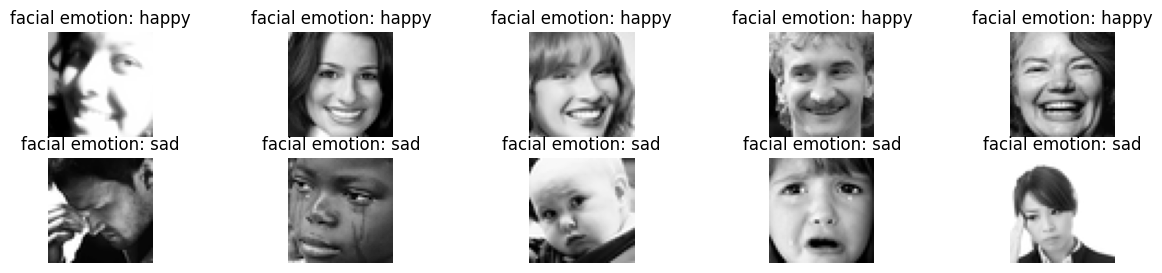

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,3))
for i, h in zip(range(5), highest_indices):
    img = hs_x_testing[h, :]
    img = img.reshape(48, 48)

    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title('facial emotion: %s' % get_emotion(hs_y_testing[h, :]))
    axes[0, i].axis('off')

for i, l in zip(range(5), lowest_indices):
    img = hs_x_testing[l, :]
    img = img.reshape(48, 48)

    axes[1,i].imshow(img, cmap='gray')
    axes[1,i].set_title('facial emotion: %s' % get_emotion(hs_y_testing[l, :]))
    axes[1,i].axis('off')

plt.show()

In the image above, the 5 happiest faces can be seen in the first row, and the 5 saddest faces can be seen in the second row.

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

##### [4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [63]:
# flatten the images
flatten_x_training = np.array([img.flatten() for img in x_training])
flatten_x_testing = np.array([img.flatten() for img in x_testing])

# min-max-scale vectors
scaled_flatten_x_training = mm_scaler.fit_transform(flatten_x_training)
scaled_flatten_x_testing = mm_scaler.fit_transform(flatten_x_testing)

Let's start by applying PCA, for visualization purposes we'll do 2 components.

In [61]:
pca = PCA(n_components=2)

In [64]:
pca_scaled_flatten_x_training = pca.fit_transform(scaled_flatten_x_training)
pca_scaled_flatten_x_testing = pca.transform(scaled_flatten_x_testing)

In [65]:
features, labels = sample_n(200, pca_scaled_flatten_x_training, y_training)

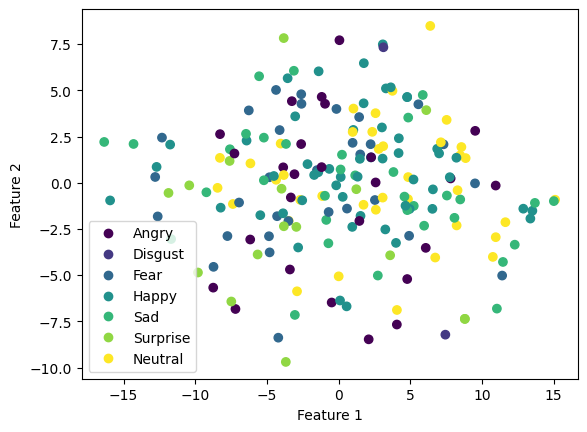

In [81]:
# Create a scatter plot with different colors for each label
scatter = plt.scatter(features[:, 0], features[:, 1], c=np.argmax(labels, axis=1))

# Set the x and y axis labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend to the plot
plt.legend(handles=scatter.legend_elements()[0], labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

# Show the plot
plt.show()

Now let's do the same for LDA.

In [82]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [84]:
lda_scaled_flatten_x_training = lda.fit_transform(scaled_flatten_x_training, np.argmax(y_training, axis=1))
lda_scaled_flatten_x_testing = lda.fit_transform(scaled_flatten_x_testing, np.argmax(y_testing, axis=1))

In [89]:
lda_scaled_flatten_x_training

array([[-0.89790061,  0.73966435],
       [ 0.48954574,  1.71634766],
       [ 0.68148867, -1.57105183],
       ...,
       [ 0.37270918,  1.09405938],
       [ 1.11375301, -0.87471452],
       [ 0.8943968 ,  0.1093783 ]])

In [86]:
features, labels = sample_n(200, lda_scaled_flatten_x_training, y_training)

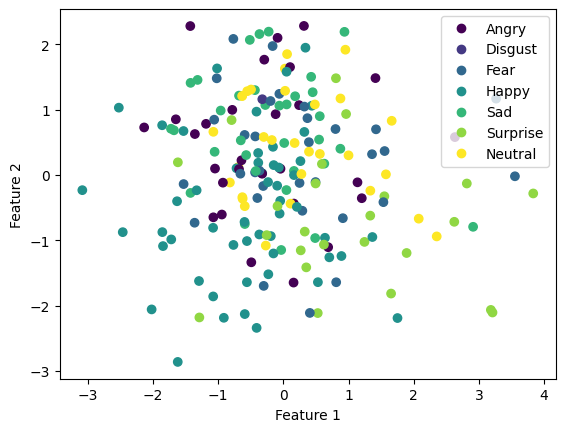

In [90]:
# Create a scatter plot with different colors for each label
scatter = plt.scatter(features[:, 0], features[:, 1],  c=np.argmax(labels, axis=1))

# Set the x and y axis labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend to the plot
plt.legend(handles=scatter.legend_elements()[0], labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

# Show the plot
plt.show()

LDA seems to maintain a clearer separation between classes than PCA. In the graph above the lower left region seem to be consistently associated with happiness and sadness seems to occupy more of the mid-top section, for example.

##### [2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [110]:
y_training_label = np.argmax(y_training, axis=1)
y_testing_label = np.argmax(y_testing, axis=1)

In [93]:
gnb = GaussianNB()
gnb.fit(flatten_x_training, y_training_label)

y_pred = gnb.predict(flatten_x_testing)
accuracy = accuracy_score(np.argmax(y_testing, axis=1), y_pred)

In [94]:
accuracy

0.22736138200055725

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

For multi-class classification the classifier fits a Gaussian distribution for each class, it then computes the conditional probability that the item belongs to each of the classes using Bayes' theorem. The class with the highest probability is the selected class. Each class is treated as a binary classification problem, the probability the item belongs or not to each class is calculated, and the item is said to belong to the highest probability class.

In [106]:
def plot_heatmap(y_testing, y_pred, labels):
    y_true = np.argmax(y_testing, axis=1)
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(cm, cmap='Blues')

    # Set the x-axis and y-axis labels
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    # Set the x-axis and y-axis tick labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    #Loop over the data and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, cm[i, j],
                        ha="center", va="center", color="black")

    # Add a color bar legend
    cbar = ax.figure.colorbar(im, ax=ax)

    # Show the plot
    plt.show()


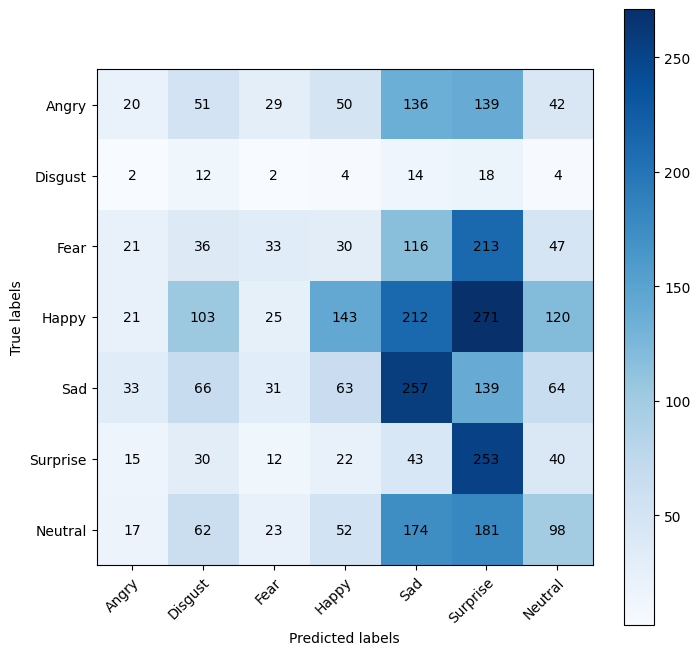

In [107]:
labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
plot_heatmap(y_testing_label, y_pred, labels)

##### [2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [111]:
lgr = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lgr.fit(scaled_flatten_x_training, y_training_label)

y_pred = lgr.predict(scaled_flatten_x_testing)
lgr_accuracy = accuracy_score(y_testing_label, y_pred)
lgr_accuracy

0.3719699080523823

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

In this case we performed the Logistic Regression following a "One-vs-Rest" approach. In this approach, one classifier is built for each of the classes. For the prediction, each classifier outputs a number between 0 and 1 that represents the probability it belongs to each of the classes and the one with the highest probability is picked.

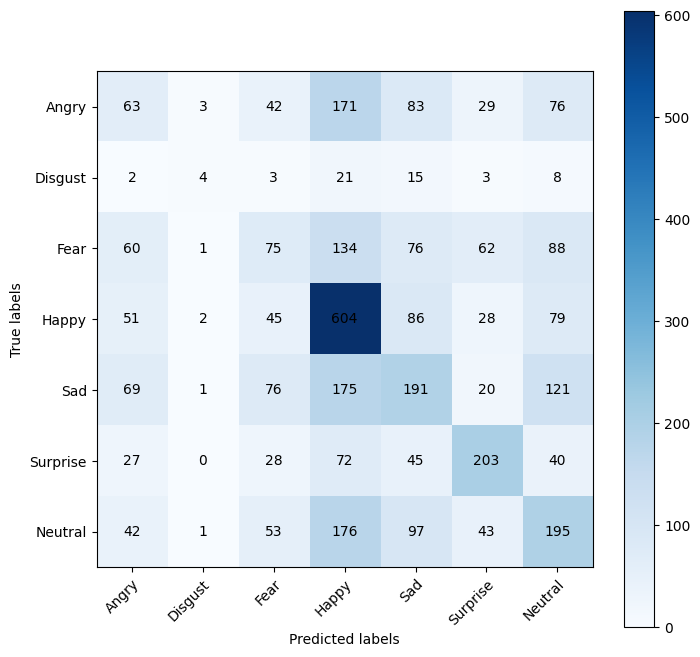

In [112]:
plot_heatmap(y_testing, y_pred, labels)

##### [2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [113]:
svm = SVC(kernel='linear', C=0.0043, degree=2, gamma=0.00015)
svm.fit(scaled_flatten_x_training, y_training_label)
y_pred = svm.predict(scaled_flatten_x_testing)
svm_accuracy = accuracy_score(y_testing_label, y_pred)
svm_accuracy

0.3945388687656729

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

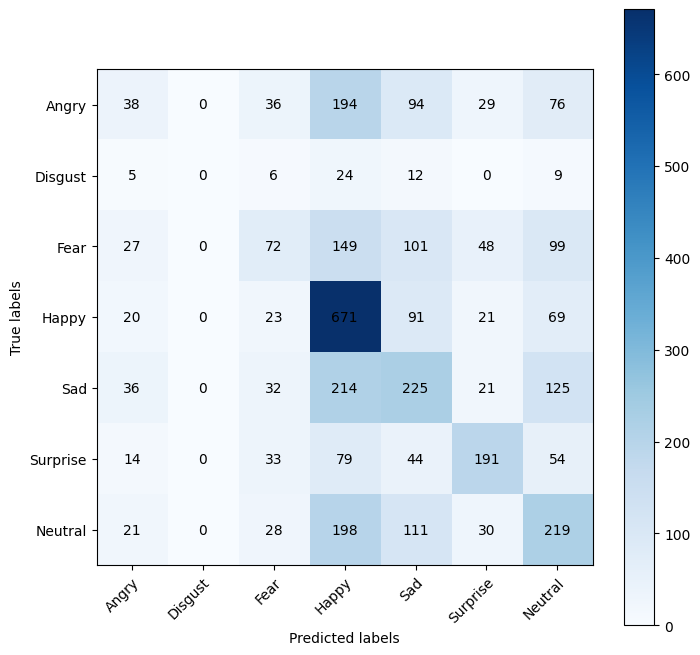

In [114]:
plot_heatmap(y_testing, y_pred, labels)

##### [2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

##### [4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [79]:
# YOUR CODE HERE

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [80]:
# YOUR CODE HERE